# Create your first wordcloud

[![Open In Colab](colab-badge.svg)](https://colab.research.google.com/github/alexisperrier/intro2nlp/blob/master/notebooks/intro2nlp_01_Create_a_wordcloud.ipynb)

In this first chapter of the Intro to NLP course, you learn how to load a page from wikipedia and create a wordcloud. 

Let's start by installing the [wordcloud](https://github.com/amueller/word_cloud) library 

In [49]:
!pip install wordcloud

# Content from wikipedia

Wikipedia is a great source of quality text. 
We use the Wikipedia API to get the text of a page given its title


In [50]:
# 1) import the necessary library
import requests

# 2) set the title of the page (uncomment to change the page)
title = 'Earth'

# 3) send a request to the wikipedia api 
# asking to return content of the page formatted as json

response = requests.get(
    'https://en.wikipedia.org/w/api.php',
    params={
        'action': 'query',
        'format': 'json',
        'titles': title,
        'prop': 'extracts',
        'explaintext': True,
    }).json()
    
# 4) Parse the result and extract the text
page = next(iter(response['query']['pages'].values()))
text = page['extract']


In [51]:
# print the 1st 300 characters from the text
print(text[:300])

Earth is the third planet from the Sun and the only astronomical object known to harbor life. About 29% of Earth's surface is land consisting of continents and islands. The remaining 71% is covered with water, mostly by oceans but also by lakes, rivers and other fresh water, which together constitut


Let's wrap the code to get text from wikipedia into a convenient function

In [52]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"



In [53]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('Earth').lower()
print(text) 

earth is the third planet from the sun and the only astronomical object known to harbor life. about 29% of earth's surface is land consisting of continents and islands. the remaining 71% is covered with water, mostly by oceans but also by lakes, rivers and other fresh water, which together constitute the hydrosphere. much of earth's polar regions are covered in ice. earth's outer layer is divided into several rigid tectonic plates that migrate across the surface over many millions of years. earth's interior remains active with a solid iron inner core, a liquid outer core that generates earth's magnetic field, and a convecting mantle that drives plate tectonics.
according to radiometric dating estimation and other evidence, earth formed over 4.5 billion years ago. within the first billion years of earth's history, life appeared in the oceans and began to affect earth's atmosphere and surface, leading to the proliferation of anaerobic and, later, aerobic organisms. some geological eviden

# Create a wordcloud 
We use the [wordcloud](https://github.com/amueller/word_cloud) library.

Modify the parameters to get different results (size, max_words, ...)

The Wordcloud library comes with its own list of stopwords. To disable it we set the list of stopwords to be empty.

            stopwords = []

In [54]:
# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 600, 
        height= 300,
        max_words = 300,
        stopwords = [])

# Apply the wordcloud to the text.
wordcloud.generate(text)

We use matplotlib to display the word cloud as an image:

(-0.5, 599.5, 299.5, -0.5)

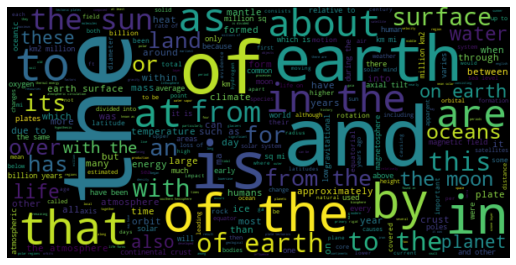

In [55]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

We mostly see stopwords: _the_  _of_  _by_ _in_ etc ...

To get rid of these stopwords, we build a new wordcloud, this time without setting the stopword parameter to an empty list.

(-0.5, 799.5, 399.5, -0.5)

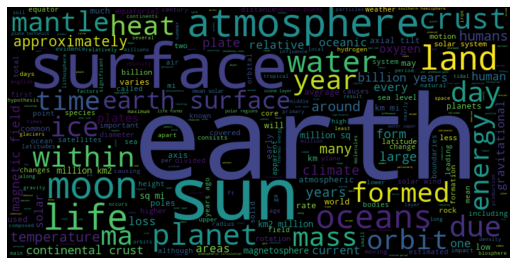

In [56]:
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800, 
        height= 400,
        max_words = 300)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

A wordcloud which is much more representative of the Earth wikipedia page.

Let's see what we get for another page, ... for instance [New York](https://en.wikipedia.org/wiki/New_York)

(-0.5, 799.5, 399.5, -0.5)

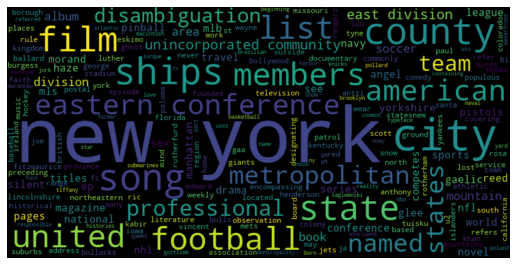

In [57]:
# Text
text = wikipedia_page('New_York').lower()
# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800, 
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


You get the gist :)

# Gutenberg project

The [Gutenberg project](https://www.gutenberg.org) is another great source of text.


In [58]:
import requests
# this is the url for Frankenstein, by Mary Wollstonecraft Shelley
frankenstein_url = 'https://www.gutenberg.org/files/84/84-0.txt'

# this is the url for Alice in Wonderland by Lewis Carroll
alice_url = 'http://www.gutenberg.org/files/11/11-0.txt'
result = requests.get(alice_url)

print(result.text)

ï»¿The Project Gutenberg EBook of Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using this ebook.

Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]




Aliceâs Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down

(-0.5, 799.5, 399.5, -0.5)

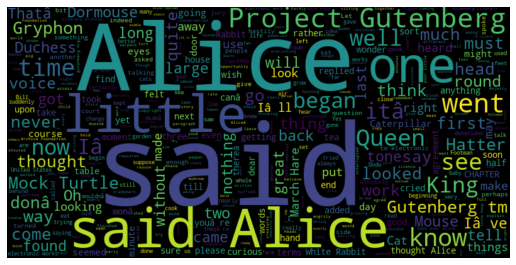

In [59]:
text = result.text
# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800, 
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")